# Wine Quality Prediction 

### Objective:

This project aims to develop machine learning models for predicting wine quality based on chemical characteristics. Utilizing diverse attributes like density and acidity, we'll build three classifiers to accurately classify wine quality. This real-world application demonstrates the potential of machine learning in viticulture, aiding winemakers in making informed decisions and potentially enhancing wine production processes.

### Problem Statement

Ensuring wine quality is a pivotal concern for producers and consumers alike. This project seeks to address the challenge of predicting wine quality using machine learning techniques, providing a practical application within the viticulture domain. The dataset at hand comprises a range of chemical attributes, such as density and acidity, which are pivotal in determining wine quality. Our objective is to develop three distinct classifier models that leverage these diverse chemical features to accurately predict wine quality. By doing so, we aim to offer winemakers and viticulturists a valuable tool for enhancing quality control processes and refining production strategies.

### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("WineQT.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df = df.drop("Id",axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [7]:
df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.000000,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,1143.000000,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,1143.000000,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,1143.000000,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1143.000000,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1143.000000,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,1143.000000,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,1143.000000,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,1143.000000,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,1143.000000,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


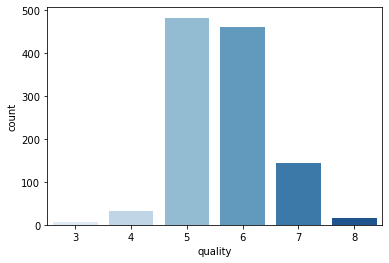

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='quality',data=df,palette='Blues')
plt.show()

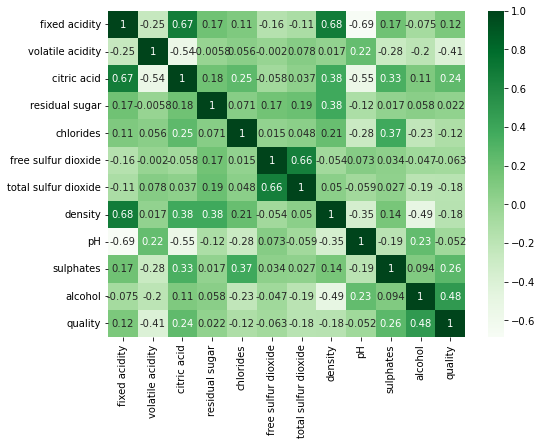

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="Greens")
plt.show()

### Visualization:

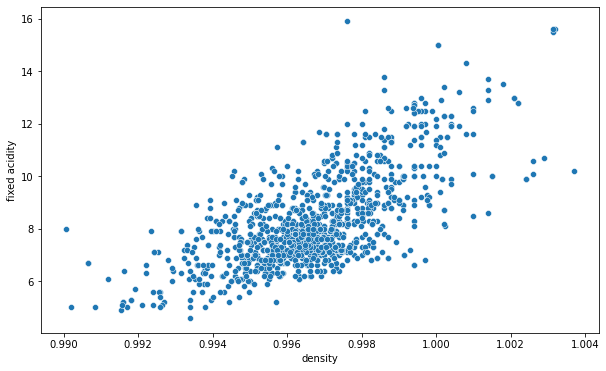

In [10]:
#Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='density',y='fixed acidity',data=df)
plt.show()

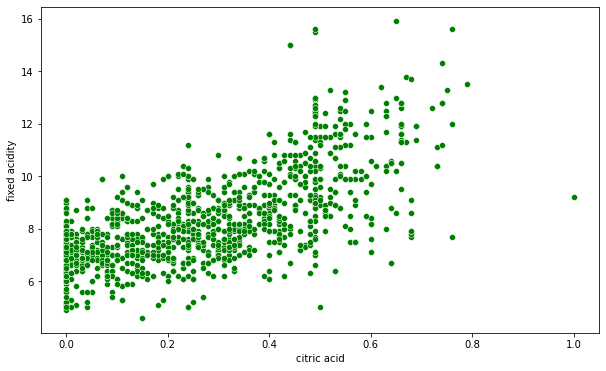

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='citric acid',y='fixed acidity',data=df,color="Green")
plt.show()

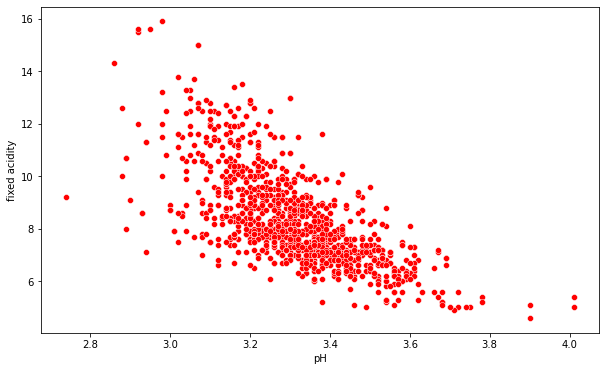

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pH',y='fixed acidity',data=df,color="Red")
plt.show()

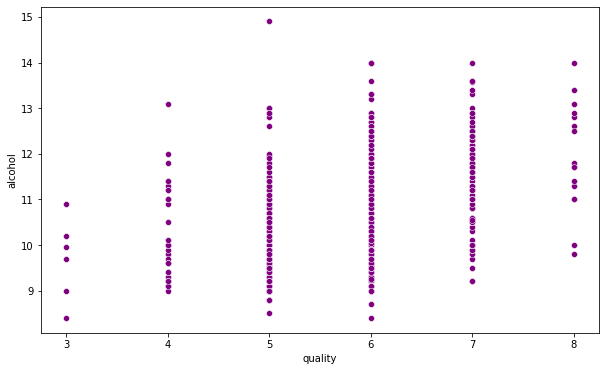

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='quality',y='alcohol',data=df,color="purple")
plt.show()

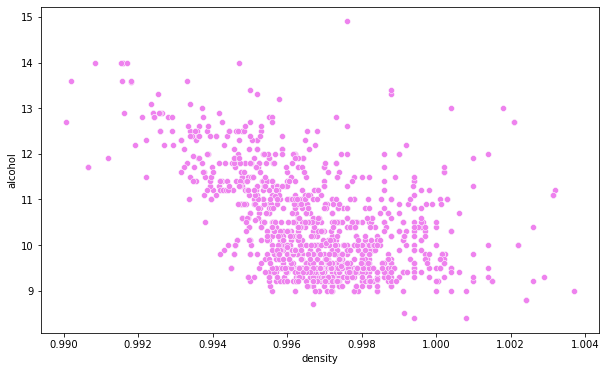

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='density',y='alcohol',data=df,color="violet")
plt.show()

In [15]:
#Box Plot

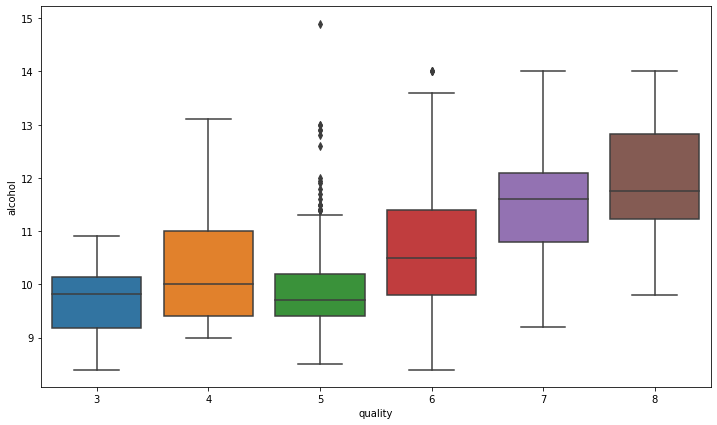

In [16]:
plt.figure(figsize=(12,7))
sns.boxplot(x='quality',y='alcohol',data=df)
plt.show()

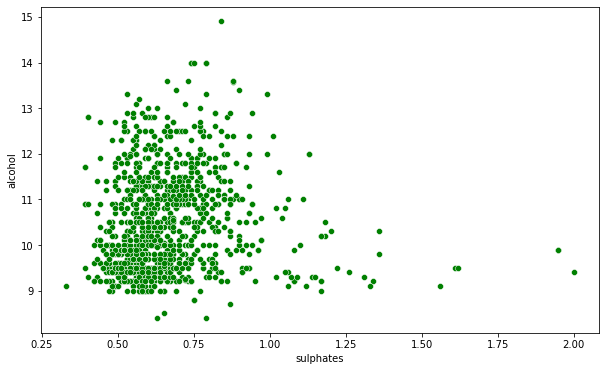

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sulphates',y='alcohol',data=df,color="Green")
plt.show()

### Splitting Data

In [18]:
x = df.drop(["quality"],axis=1)
y = df["quality"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
x.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [20]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.66      0.77      0.71        95
           6       0.54      0.64      0.58        95
           7       0.20      0.03      0.06        31
           8       0.00      0.00      0.00         5

    accuracy                           0.59       229
   macro avg       0.23      0.24      0.23       229
weighted avg       0.52      0.59      0.55       229

Accuracy of Logistic Regression is :  58.951965065502186


### Model Evaluation Metrics:

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.44541484716157204
Mean Squared Error :  0.5152838427947598
Root Mean Squared Error :  0.7178327401245779
R2 Score :  0.19591739570314826


### Confusion Matrix Visualization:

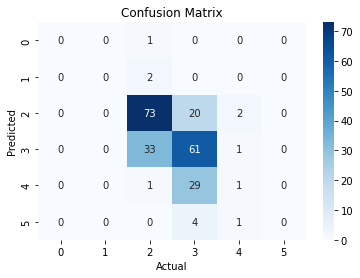

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,regpred),annot=True,cmap="Blues")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

### Decision Tree

In [24]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.72      0.68      0.70        95
           6       0.64      0.59      0.61        95
           7       0.50      0.58      0.54        31
           8       0.25      0.20      0.22         5

    accuracy                           0.61       229
   macro avg       0.35      0.34      0.35       229
weighted avg       0.64      0.61      0.62       229

Accuracy of Decision Tree is :  61.135371179039296


In [25]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.4978165938864629
Mean Squared Error :  0.74235807860262
Root Mean Squared Error :  0.8616020418978939
R2 Score :  -0.1584240909361423


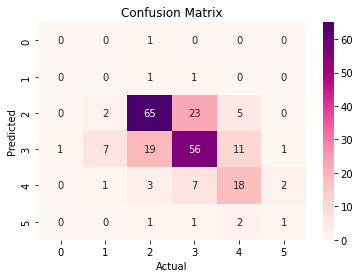

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,dtreepred),annot=True,cmap="RdPu")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classification:

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.73      0.73      0.73        95
           6       0.65      0.72      0.68        95
           7       0.62      0.58      0.60        31
           8       1.00      0.20      0.33         5

    accuracy                           0.68       229
   macro avg       0.50      0.37      0.39       229
weighted avg       0.68      0.68      0.67       229

Accuracy of Random Forest is is :  68.12227074235808


In [28]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

Mean Absolute Error :  0.3406113537117904
Mean Squared Error :  0.38427947598253276
Root Mean Squared Error :  0.6199027955918031
R2 Score :  0.4003451764565852


### Confusion Matrix Visualization: 

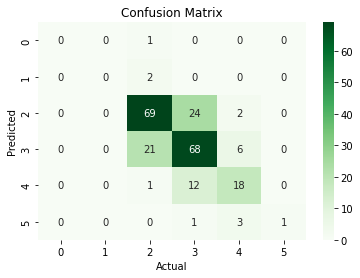

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,rfpred),annot=True,cmap="Greens")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

### Hyper Parameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(x_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=50)


In [31]:
model_grid = RandomForestClassifier(max_depth=9,
                                    max_features="log2",
                                    max_leaf_nodes=9,
                                    n_estimators=25)
model_grid.fit(x_train, y_train)
y_pred_grid = rf.predict(x_test)
print(classification_report(y_pred_grid, y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.73      0.73      0.73        94
           6       0.72      0.65      0.68       105
           7       0.58      0.62      0.60        29
           8       0.20      1.00      0.33         1

    accuracy                           0.68       229
   macro avg       0.37      0.50      0.39       229
weighted avg       0.70      0.68      0.69       229



### Model Performance Comparision

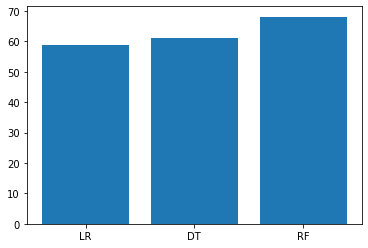

In [32]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()

### Feature Importance Calculation:

In [33]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

                 feature  importance
10               alcohol    0.144022
9              sulphates    0.123592
1       volatile acidity    0.108056
6   total sulfur dioxide    0.098628
7                density    0.088129
4              chlorides    0.081789
2            citric acid    0.074481
0          fixed acidity    0.073452
8                     pH    0.072763
5    free sulfur dioxide    0.067637
3         residual sugar    0.067452


### Conclusion:

    Model Performance Comparison: Random Forest demonstrates superior accuracy compared to Logistic Regression and Decision Tree models.

    Feature Importance Analysis: "Alcohol," "sulphates," and "volatile acidity" emerge as pivotal features for predicting wine quality, highlighting their significant impact on overall quality.

    Imbalanced Data: The dataset showcases a slight imbalance, emphasizing the need for addressing class imbalance to maintain model efficacy.

    Impact of Hyperparameter Tuning: Although hyperparameter tuning may not drastically enhance overall accuracy, it positively influences precision, recall, and F1 score. This underscores its importance in improving the model's ability to correctly classify positive and negative instances.

    Tuning Techniques Used: Employing GridSearchCV and RandomizedSearchCV facilitates exploring various hyperparameter combinations, leading to the identification of optimal configurations that maximize model performance metrics.

    In summary, this analysis underscores the efficacy of Random Forest in predicting wine quality, identifies key features driving predictions, emphasizes the importance of addressing data imbalance, and highlights the positive impact of hyperparameter tuning on model performance.